# 📊Project Overview
**Segment customers based on their purchasing behavior to identify high-value customers and tailor marketing strategies.**

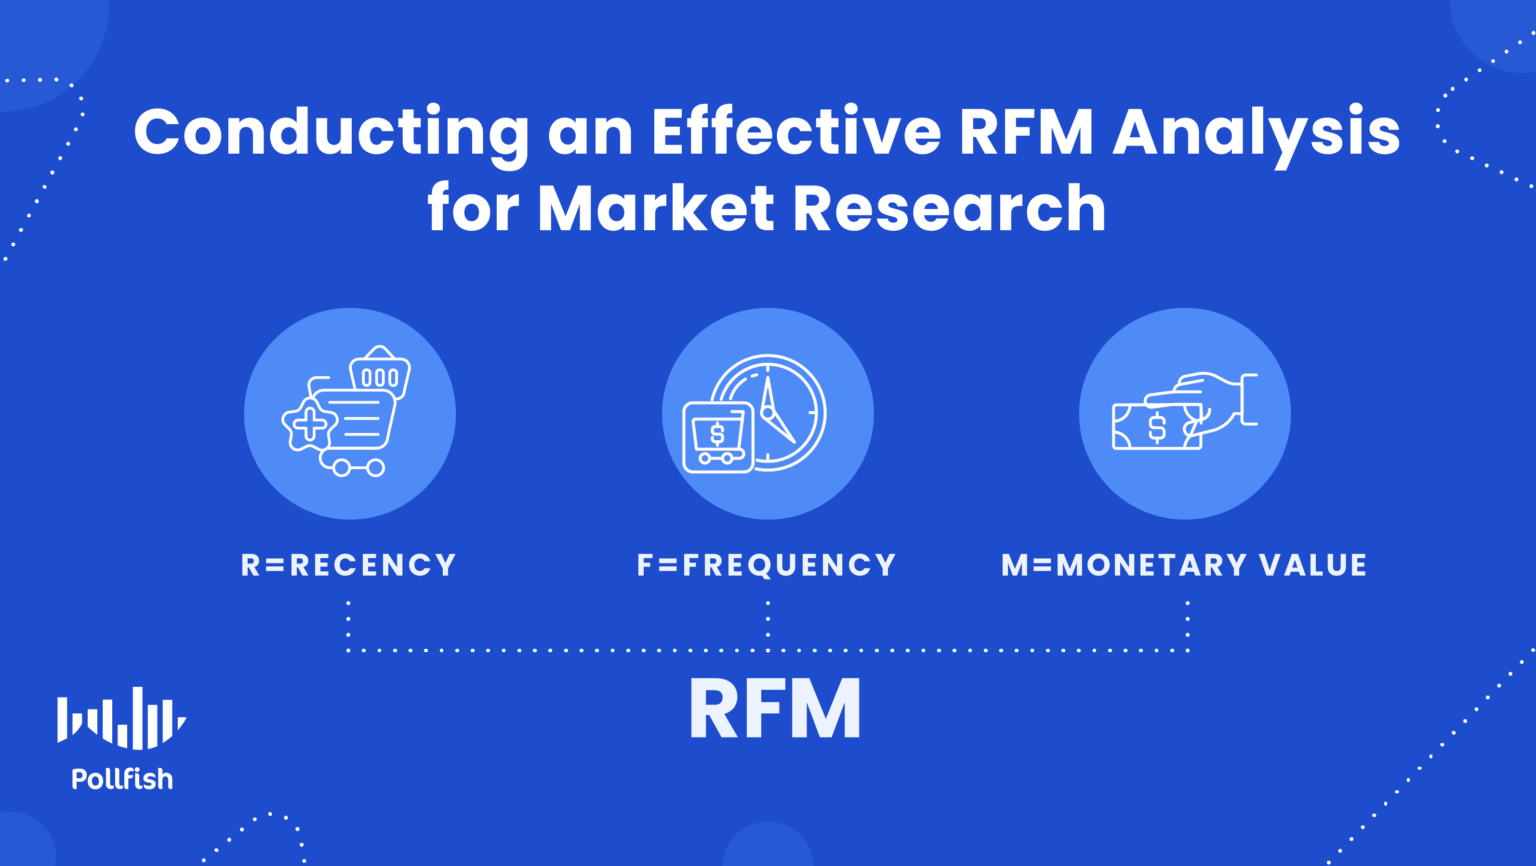

# 🤔 Why using  Customer Segmentation



1. Identify Valuable Customers: RFM analysis helps identify the most valuable customers who are likely to contribute the most to your revenue.

2. Optimize Marketing Efforts: By segmenting customers based on their purchasing behavior, businesses can tailor their marketing efforts more effectively.

3. Improve Customer Retention: Understanding which customers are at risk of churning (e.g., those with low recency scores) allows businesses to take proactive steps to retain them, such as offering special incentives or reaching out with personalized messages.

4. Increase Customer Lifetime Value: By focusing on high-frequency and high-monetary customers, businesses can develop strategies to maximize the lifetime value of these customers.



# ❓What
Grouping customer  based on similar  characteristics

# 😃 How using  Customer Segmentation




1. Demographic Segmentation
2.  Geographic Segmentation
3. Behavioral Segmentation
4.  Psychographic Segmentation





# 📈 RFM technique
RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to evaluate and categorize customers based on their purchasing behavior.


*   Recency (R): Measures how recently a customer made a purchase. Customers who have purchased more recently are more likely to buy again.

* Frequency (F): Measures how often a customer makes a purchase. Frequent customers are more likely to be loyal.

* Monetary (M): Measures how much money a customer spends. High-spending customers are typically more valuable.



# 1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# 2️⃣Loading dataset

In [2]:

df=pd.read_excel('/kaggle/input/customer-online-retail-dataset/Online Retail Data.xlsx')

# 3️⃣General idea from the dataset

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# 📈 Overview  of dataset



| **Column**     | **Description** |
|----------------|-----------------|
| **InvoiceNo**  | This column represents the unique identifier for each transaction or invoice. Each invoice can contain multiple rows, with each row representing a different item purchased in that transaction. |
| **StockCode**  | This column contains the unique identifier for each product or item in the inventory. It helps in identifying and managing stock. |
| **Description**| This column provides a textual description of the product or item associated with the StockCode. |
| **Quantity**   | This column indicates the number of units of the product purchased in that specific transaction. |
| **InvoiceDate**| This column records the date and time when the transaction took place. It's important for calculating recency in RFM analysis. |
| **UnitPrice**  | This column shows the price of a single unit of the product. It is used to calculate the total price for the items purchased in each transaction. |
| **CustomerID** | This column contains the unique identifier for the customer who made the purchase. It’s essential for tracking customer behavior and segmenting them based on RFM metrics. |
| **Country**    | This column indicates the country where the customer resides or where the transaction took place. |


# 4️⃣Data preparation

In [7]:
df.isna().sum

<bound method DataFrame.sum of         InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(406829, 8)

In [10]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [11]:
for col in df.columns:
    print(col, ':', df['Description'].value_counts())

InvoiceNo : Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64
StockCode : Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BARO

In [12]:
df['InvoiceNo'].str.contains('C').count()

8905

In [13]:
df[~df['InvoiceNo'].str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
df['Totalprice']=df['UnitPrice']*df['Quantity']

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# 5️⃣Calculate RFM

In [16]:
today=dt.datetime(2011,12,12)


In [17]:
rfm=df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today- date.max()).days,
    'InvoiceNo': lambda num: num.nunique(),
    'Totalprice': lambda Totalprice:Totalprice.sum()
})

In [18]:
rfm.columns=['Recency','Frequency','Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,2,0.00
12347.0,4,7,4310.00
12348.0,77,4,1797.24
12349.0,20,1,1757.55
12350.0,312,1,334.40
...,...,...,...
18280.0,279,1,180.60
18281.0,182,1,80.82
18282.0,9,3,176.60


# 6️⃣Analysis based on RFM

In [19]:
rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,93.581199,5.075480,1898.459701
std,100.772139,9.338754,8219.345141
min,2.000000,1.000000,-4287.630000
25%,18.000000,1.000000,293.362500
50%,52.000000,3.000000,648.075000
75%,145.000000,5.000000,1611.725000
max,375.000000,248.000000,279489.020000


In [20]:
RFM=rfm[rfm['Monetary']>10]

In [21]:
RFM.describe()

,Recency,Frequency,Monetary
count,4315.000000,4315.000000,4315.000000
mean,91.876014,5.120742,1926.602156
std,99.125112,9.391205,8269.465596
min,2.000000,1.000000,12.750000
25%,18.000000,1.000000,303.125000
50%,51.000000,3.000000,658.640000
75%,140.000000,6.000000,1627.625000
max,375.000000,248.000000,279489.020000


# 7️⃣Calculate RFM Scores

In [22]:
# Calculate RFM scores
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop') + 1
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

# Combine RFM scores top: 5 5 ---> remove monetaryscrore!
rfm['RFMScore'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

rfm.sample(7)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
14297.0,19,6,1284.06,2,3,4,23
15720.0,26,1,598.73,2,1,3,21
16893.0,368,1,145.93,5,1,1,51
15752.0,41,8,2628.93,3,4,5,34
15147.0,220,2,608.65,5,1,3,51
15358.0,6,29,8234.80,1,4,5,14
16115.0,11,8,1667.97,1,4,4,14


# 💸 Segment Descriptions
* Champions: Bought recently, buy often, and spend the most.
* Loyal Customers: Buy on a regular basis. Responsive to promotions.
* Potential Loyalists: Recent customers with average frequency.
* Recent Customers: Bought most recently but not often.
* Promising: Recent shoppers who haven’t spent much.
* Customers Needing Attention: Above average recency, frequency, and monetary monetary values. May not have bought very recently, though.

* About To Sleep: Below average recency and frequency. Will lose them if not reactivated.
* At Risk: Purchased often but a long time ago. Need to bring them back!
* Can’t Lose Them: Used to purchase frequently but haven’t returned for a long time.
* Hibernating: Last purchase was a long time ago and had a low number of orders.
Lost: Purchased a long time ago and never came back.

In [23]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
# 12/21
# Apply segmentation
rfm['Segment'] = rfm['RFMScore'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
CustomerID,,,,,,,,
12346.0,327,2,0.00,5,1,1,51,new_customers
12347.0,4,7,4310.00,1,3,5,13,at_Risk
12348.0,77,4,1797.24,4,2,4,42,potential_loyalists
12349.0,20,1,1757.55,2,1,4,21,hibernating
12350.0,312,1,334.40,5,1,2,51,new_customers


# 8️⃣Visulation

In [24]:
# Group by segment and count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']


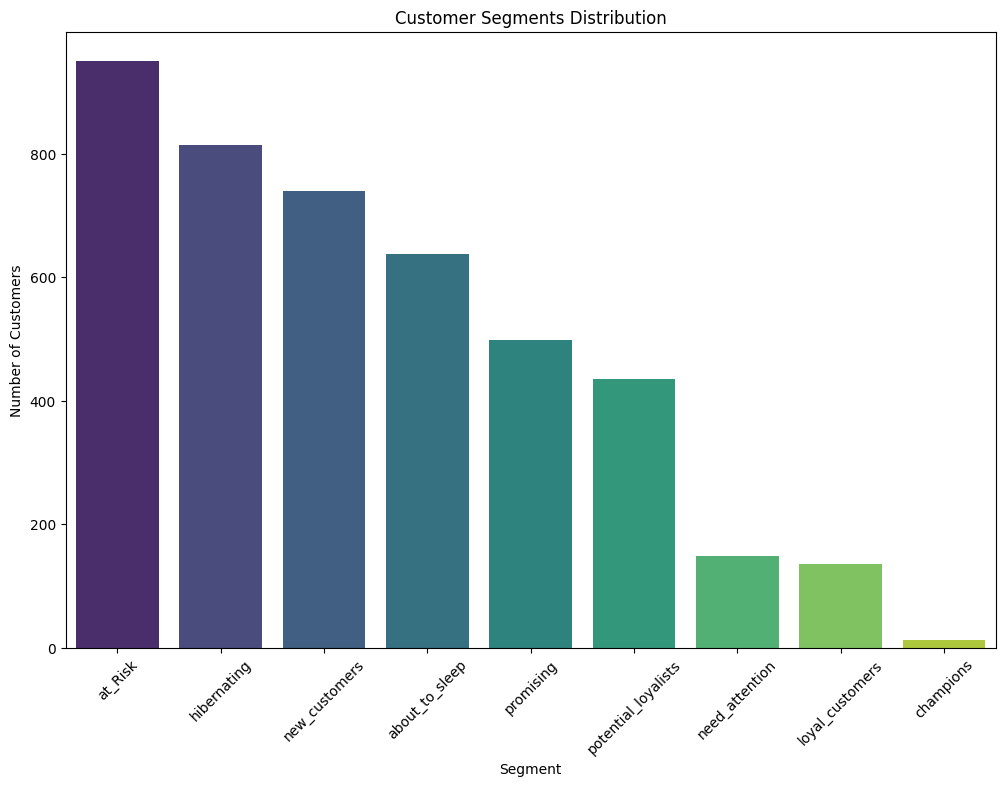

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Count', data=segment_counts, palette='viridis')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

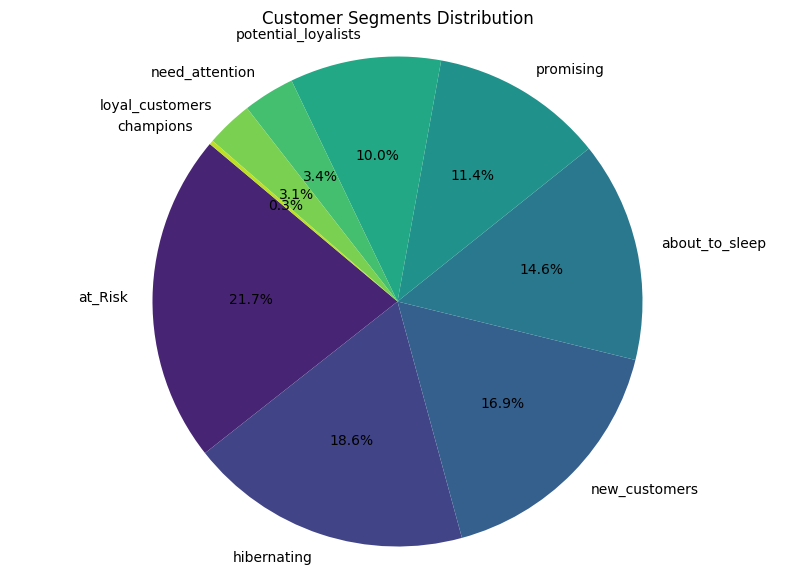

In [26]:
plt.figure(figsize=(10, 7))
plt.pie(segment_counts['Count'], labels=segment_counts['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Customer Segments Distribution')
plt.axis('equal')
plt.show()

# 9️⃣ HVC methode

The HVC (High-Value Customers) technique is used to identify and focus on customers who provide the most value to a business. These customers typically contribute significantly to the company's revenue, either through high purchase frequency, high monetary value, or both. Understanding and segmenting HVCs helps in creating targeted marketing strategies, personalized customer experiences, and maximizing profitability.

# 📝 Why using HVC
1. Revenue Maximization: Identify customers who contribute most to revenue and focus efforts on retaining and growing their value.

2. Customer Retention: Implement strategies to keep high-value customers .

3. Targeted Marketing: Develop tailored marketing campaigns that appeal specifically to high-value customers.

4. Resource Allocation: Allocate resources more efficiently by prioritizing high-value customers.

# 🗒️How using HVC

1. Calculate RFM Scores: Compute Recency, Frequency, and Monetary scores for each customer.

2. Define HVC Criteria: Use percentiles to define the threshold for high RFM scores. In this case, the top 20% (80th percentile) is used.

3. Identify HVCs: Create boolean series to identify customers who score above the 80th percentile in all three RFM dimensions.

4. Classify Customers: Use the boolean series to classify customers as 'HVC' or 'Non-HVC'.

5. Visualize Distribution: Group the classified data and create visualizations to show the distribution of HVC and Non-HVC customers.

In [27]:
# Identify HVCs based on RFM scores
top_percentile = 0.8

high_recency = rfm['RecencyScore'] > rfm['RecencyScore'].quantile(top_percentile)
high_frequency = rfm['FrequencyScore'] > rfm['FrequencyScore'].quantile(top_percentile)
high_monetary = rfm['MonetaryScore'] > rfm['MonetaryScore'].quantile(top_percentile)

# Combine criteria to identify HVCs
rfm['HVC'] = np.where(high_recency & high_frequency & high_monetary, 'HVC', 'Non-HVC')

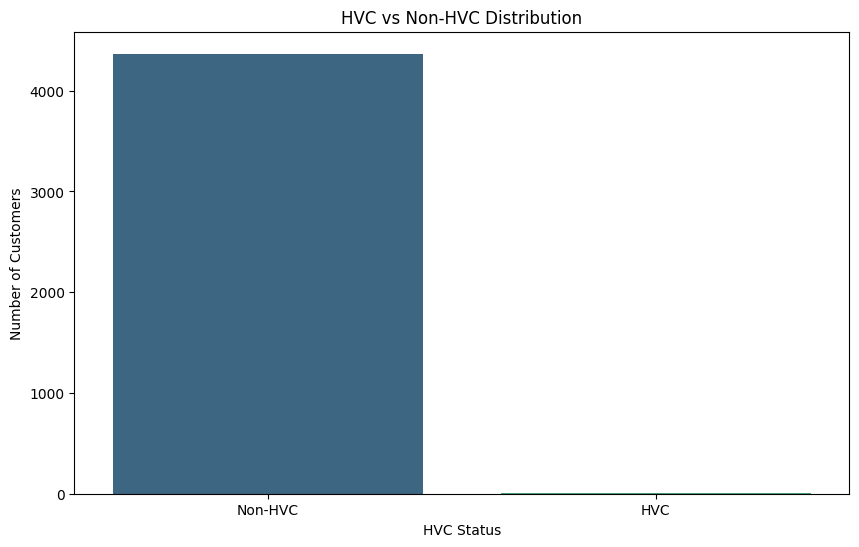

In [28]:
# Group by HVC status
hvc_counts = rfm['HVC'].value_counts().reset_index()
hvc_counts.columns = ['HVC Status', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='HVC Status', y='Count', data=hvc_counts, palette='viridis')
plt.title('HVC vs Non-HVC Distribution')
plt.xlabel('HVC Status')
plt.ylabel('Number of Customers')
plt.show()

# 🔟ML Model

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


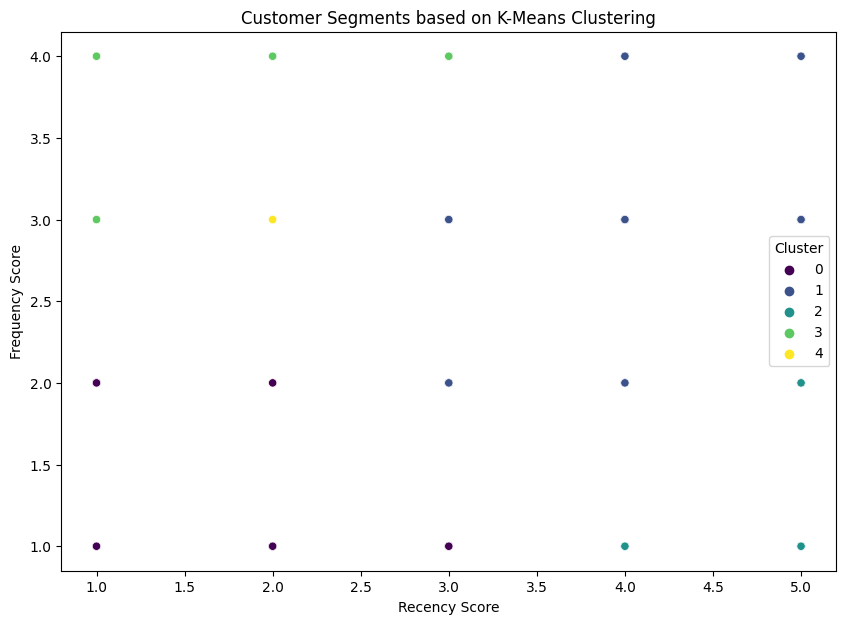

In [29]:
# analysis customer segment using k-means

from sklearn.cluster import KMeans

# Separate features (RFMScore) and target (Segment)
X = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']]
y = rfm['Segment']

#  the number of clusters (segments)
num_clusters = 5

#  fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
rfm['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_counts = rfm['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='RecencyScore', y='FrequencyScore', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments based on K-Means Clustering')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.show()


In [30]:
# prompt: Testing me the model

# Test the model on a new data point
new_customer = [5, 3, 4]  # Recency, Frequency, Monetary
predicted_cluster = kmeans.predict([new_customer])
print(f"Predicted cluster for new customer: {predicted_cluster[0]}")


Predicted cluster for new customer: 1


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
